# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель проекта состоит в том, чтобы научиться определять рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Входные данные от сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Данных два типа: первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.
Результаты исследования будут учтены при построении автоматизированной системы, которая отследит аномалии и мошенническую деятельность.**

Для достижения цели необходимо выполнить следующие задачи:

1. Обзор данных  
   1.1 Откроем файл и выведем первые пять строк датафрейма  
   1.2 Выведем общую информацию по таблице, изучим количество строк и столбцов, типы данных  
   1.3 Построим гистограмму для всех числовых столбцов таблицы  
2. Предобработка данных  
   2.1 Выведем количество пропущенных значений для каждого столбца  
   2.2 Заполним пропущенные значения там, где это возможно  
   2.3 Найдем столбцы, в которых нужно изменить тип данных, и преобразуем тип данных  
   2.4 Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты  
3. Добавление новых столбцов в датафрейм  
4. Исследовательский анализ данных  
   4.1 Обработаем и удаленим аномалии  
   4.2 Изучим, как быстро продавались квартиры  
   4.3 Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта  
   4.4 Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений  
   4.5 Выделим квартиры в Санкт-Петербурге и вычислим их среднюю стоимость на разном удалении от центра 
5. Общий вывод  

## Откройте файл с данными и изучите общую информацию

### Откроем файл и выведем первые пять строк датафрейма

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Выведем общую информацию по таблице, изучим количество строк и столбцов, типы данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Построим гистограмму для всех числовых столбцов таблицы

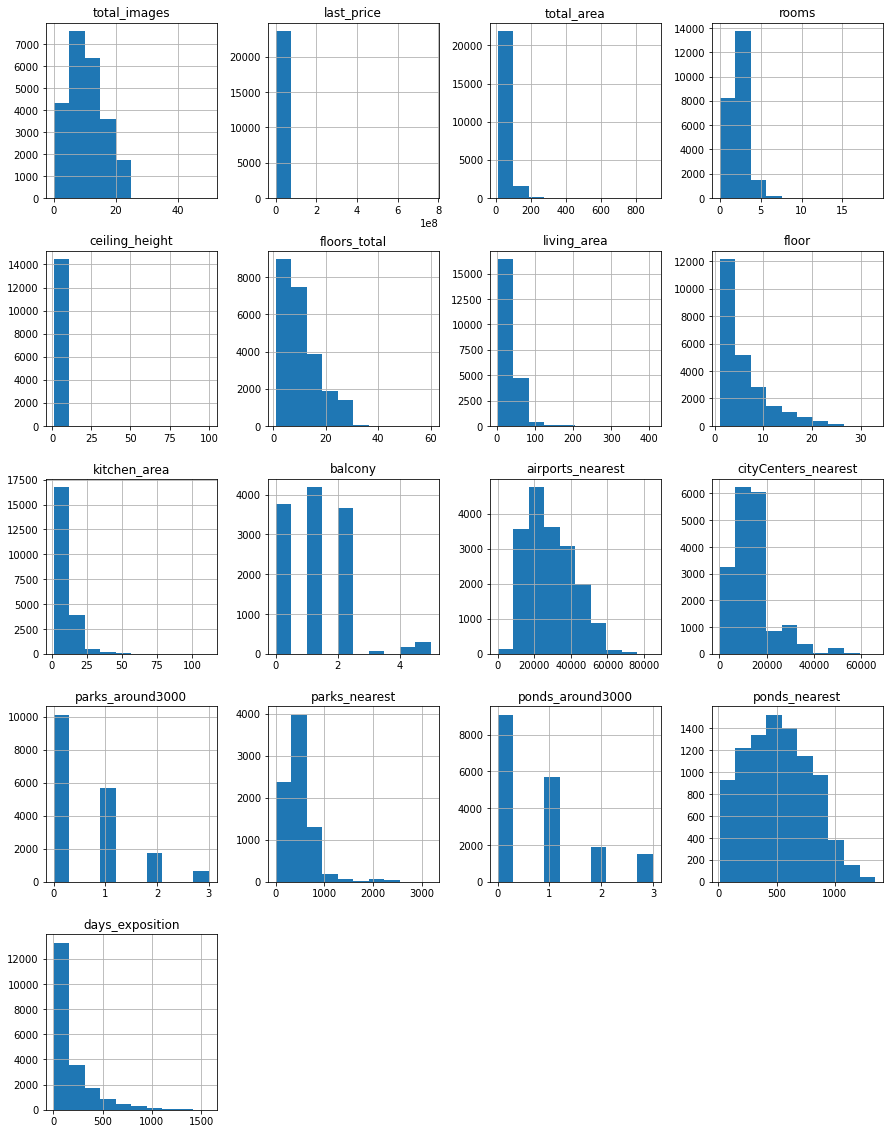

In [4]:
data.hist(figsize=(15, 20))
plt.show()

**Вывод:** В полученной таблице 23699 строки и 22 столбца. Некоторые строки содержат пропуски и аномалии.

## Выполните предобработку данных

### Выведем количество пропущенных значений для каждого столбца

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Заполним пропущенные значения там, где это возможно

Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0

In [6]:
data['balcony'] = data['balcony'].fillna(0) #заменим пропуски на 0
data['balcony'].isna().sum() #посчитаем количество пропусков в столбце для проверки

0

Пропусков в столбцах 'living_area' и 'kitchen_area' слишком много, поэтому не будем их удалять, а заменим медианой в зависимости от количества комнат по столбцу 'rooms'

In [7]:
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == i), 'living_area'].median() #заменим пропуски на медианное значение
data['living_area'].isna().sum() #посчитаем количество пропусков в столбце для проверки

0

In [8]:
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == i), 'kitchen_area'].median() #заменим пропуски на медианное значение
data['kitchen_area'].isna().sum() #посчитаем количество пропусков в столбце для проверки

197

Для некоторых значений 'rooms' нет данных по площади кухни, поэтому медиана не может быть рассчитана. Таких значений всего 197, поэтому их можно удалить. Так же поступим с пропусками в столбцах 'locality_name' (49 пропусков) и 'floors_total' (86 пропусков)

In [9]:
data = data.dropna(subset= ['kitchen_area', 'locality_name','floors_total'])
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8972
floors_total                0
living_area                 0
floor                       0
is_apartment            20617
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5447
cityCenters_nearest      5424
parks_around3000         5423
parks_nearest           15369
ponds_around3000         5423
ponds_nearest           14403
days_exposition          3157
dtype: int64

Для замены пропусков в столбце 'ceiling_height' выведем числовое описание данных по столбцу

In [10]:
data['ceiling_height'].describe()

count    14399.000000
mean         2.769387
std          1.249022
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Медиана и среднее значение выглядят как реальная высота пололков - 2,65 и 2,76, но максимальное значение достигает 100, что нереально и выглядит как аномалия. Рассмотрим распределение значений на гистограмме

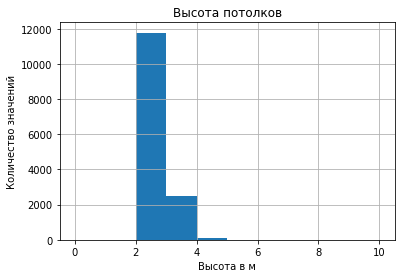

In [11]:
data.hist('ceiling_height', range=(0,10))
plt.title('Высота потолков')
plt.ylabel('Количество значений')
plt.xlabel('Высота в м')
plt.show()

По гистограмме видно, что самые частые значения - от 2 до 3 метров, меньше значений от 3 до 4 метров, и еще меньше от 4 до 5, следовательно, высоту потолков можно заменить медианой, т.к. медиана позволяет нивелировать влияние значений, выделяющихся из общей выборки, а значит результаты и выводы будут корректнее.

In [12]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) #заменяем пропуски медианным значением
data['ceiling_height'].isna().sum() #посчитаем количество пропусков в столбце для проверки

0

При создании объявления все эти данные вводятся вручную, поэтому вероятнее всего, виноват человеческий фактор: невнимательность пользователя или отсутствие у пользователя необходимых данных в момент заполнения. Помимо этого возможен технический фактор, как на этапе загрузки и на этапе выгрузки данных, так и из-за неправильного запроса или объединения таблиц.

В столбце 'is_apartment' есть значения False, значит, там должен быть булев тип данных, соответственно, пропуски могут означать, что объект недвижимости в объявлении не является апартаментами, поэтому заменим их на False (т.е. не является апартаментами)

In [13]:
data['is_apartment'] = data['is_apartment'].fillna('False')

Столбцы 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition' заполняются автоматически, поэтому предложить логичную замену для пропусков в этих столбцах невозможно. Пропуски в значениях могли возникнуть из-за ошибки при заполнении, на этапе загрузки или выгрузки данных, из-за неправильного запроса или объединения таблиц.

In [14]:
data.isna().sum() #проверим количество пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5447
cityCenters_nearest      5424
parks_around3000         5423
parks_nearest           15369
ponds_around3000         5423
ponds_nearest           14403
days_exposition          3157
dtype: int64

### Найдем столбцы, в которых нужно изменить тип данных, и преобразуем тип данных

В некоторых столбцах следует изменить тип данных для избежания дальнейших ошибок в вычислениях. Например, в данном случае количество этажей и балконов - целое число

In [15]:
data['floors_total'] = data['floors_total'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')

В столбце 'is_apartment'должен быть булев тип данных. Возможно, тип данных изменился при загрузке или выгрузке, изменим его на bool

In [16]:
data['is_apartment'] = data['is_apartment'].astype('bool')

В столбце 'first_day_exposition' нужна дата. Возможно, тип данных изменился при загрузке или выгрузке, изменим его на datetime

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format= '%Y-%m-%dT%H:%M:%S')

In [18]:
data.info() #изучим данные еще раз

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23371 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23371 non-null  int64         
 1   last_price            23371 non-null  float64       
 2   total_area            23371 non-null  float64       
 3   first_day_exposition  23371 non-null  datetime64[ns]
 4   rooms                 23371 non-null  int64         
 5   ceiling_height        23371 non-null  float64       
 6   floors_total          23371 non-null  int64         
 7   living_area           23371 non-null  float64       
 8   floor                 23371 non-null  int64         
 9   is_apartment          23371 non-null  bool          
 10  studio                23371 non-null  bool          
 11  open_plan             23371 non-null  bool          
 12  kitchen_area          23371 non-null  float64       
 13  balcony         

### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты

Проверим, есть ли в таблице явные дубликаты

In [19]:
data.duplicated().sum()

0

Явных дубликатов нет, поэтому перейдем к неявным. Посчитаем уникальные значения, затем выведем перечень уникальных значений в столбце 'locality_name'

In [20]:
data['locality_name'].nunique()

362

In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В данных много неявных дубликатов: слово "поселок" пишется как с использованием ё, так и без нее, "поселок городского типа" часто заменяется на "городской поселок", а "поселок при железнодорожной станции" на "поселок станции". Заменим названия в существующем столбце

In [22]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок', 'поселок станции'], ['поселок городского типа', 'поселок при железнодорожной станции'], regex=True)
) #заменим названия
data['locality_name'].nunique() #еще раз посчитаем количество уникальных значений

319

Уникальных значений стало меньше, теперь проверим сами значения

In [23]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

Неявные дубликаты устранены

**Вывод:** На этапе предобработки данных были найдены, изучены и, по возможности, устранены пропуски, явные и неявные дубликаты, преобразованы типы данных. Данные готовы для дальнейшего изучения.

## Добавьте в таблицу новые столбцы

Добавим в таблицу новые столбцы со следующими параметрами: цена одного квадратного метра; день недели публикации объявления; месяц публикации объявления; год публикации объявления; тип этажа квартиры (значения — «первый», «последний», «другой»); расстояние до центра города в километрах.

In [24]:
#добавим столбец с ценой одного квадратного метра (разделим стоимость объекта на его общую площадь, а затем округлим до двух знаков после запятой)
data['sq_meter_price'] = round(data['last_price'] / data['total_area'], 2) 

In [25]:
#добавим день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['publication_day'] = data['first_day_exposition'].dt.weekday

In [26]:
#добавим месяц публикации объявления
data['publication_month'] = data['first_day_exposition'].dt.month

In [27]:
#добавим год публикации объявления
data['publication_year'] = data['first_day_exposition'].dt.year

In [28]:
#добавим тип этажа квартиры (значения — «первый», «последний», «другой»)
#категоризируем этажи с помощью функции
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    try:
        if floor == 1 or floors_total == 1:
            return 'первый'
        elif (floor == floors_total) & (floors_total != 1):
            return 'последний'
        elif (floor > 1) | (floor != floors_total):
            return 'другой'
    except:
        pass
        
data['floor_type'] = data.apply(floor_category, axis=1) #применим функцию и создадим новый столбец для значений
data['floor_type'].value_counts() #выведем количество категоризированных значений

другой       17161
последний     3319
первый        2891
Name: floor_type, dtype: int64

In [29]:
#расстояние до центра города в километрах (переведите из м в км и округлим до ближайших целых значений)
data['city_center_km'] = round(data['cityCenters_nearest'] / 1000, 2)

In [30]:
data.info() #выведем общую информацию по таблице, чтобы проверить наличие новых столбцов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23371 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23371 non-null  int64         
 1   last_price            23371 non-null  float64       
 2   total_area            23371 non-null  float64       
 3   first_day_exposition  23371 non-null  datetime64[ns]
 4   rooms                 23371 non-null  int64         
 5   ceiling_height        23371 non-null  float64       
 6   floors_total          23371 non-null  int64         
 7   living_area           23371 non-null  float64       
 8   floor                 23371 non-null  int64         
 9   is_apartment          23371 non-null  bool          
 10  studio                23371 non-null  bool          
 11  open_plan             23371 non-null  bool          
 12  kitchen_area          23371 non-null  float64       
 13  balcony         

**Вывод:** Для удобства в таблицу были добавлены новые столбцы со следующими параметрами: цена одного квадратного метра;
день недели публикации объявления; месяц публикации объявления; год публикации объявления; тип этажа квартиры; расстояние до центра города в километрах.

## Проведите исследовательский анализ данных

### Обработка и удаление аномалий

При начальном изучении данных мы вывели гистограмму по каждому столбцу. Некоторые из них содержали видимые аномалии, рассмотрим их подробнее

**Общая площадь**

In [31]:
data['total_area'].describe() #выведем числовое описание данных по столбцу

count    23371.000000
mean        60.580161
std         35.613640
min         12.000000
25%         40.200000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

Квартира площадью 12 квадратных метров - явление маловероятное, как и 900 квадратных метров, особенно, учитывая медиану 52 квадратных метра и среднее - 60. Рассмотрим данные на диаграмме размахаи гистограмме

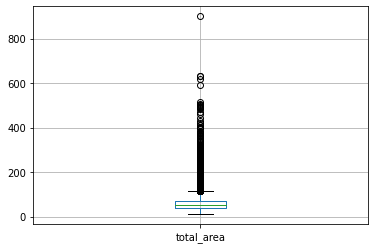

In [32]:
data.boxplot('total_area') #выведем диаграмму размаха
plt.show()

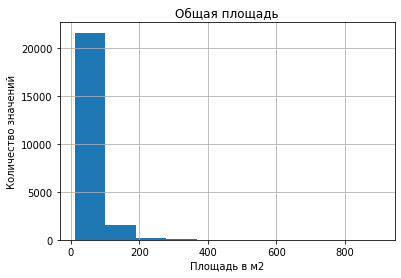

In [33]:
data.hist('total_area')
plt.title('Общая площадь')
plt.ylabel('Количество значений')
plt.xlabel('Площадь в м2')
plt.show() #выведем гистограмму

На обоих графиках видно, что большая часть значений выпадает на область между 0 и 200, а все, что выше 400 практически незаметно. Выведем еще одну гистограмму, где ограничим область значений минимальным (12) и тем, где значений становится совсем мало (350) и увеличим число корзин

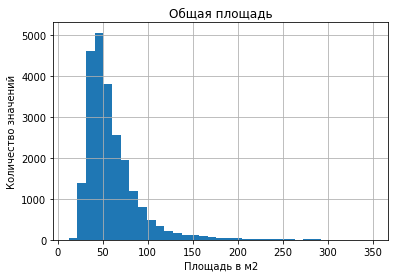

In [34]:
data.hist('total_area', bins=35, range= (12, 350))
plt.title('Общая площадь')
plt.ylabel('Количество значений')
plt.xlabel('Площадь в м2')
plt.show()

На этой гистограмме видно, что большая часть значений находится между 40 и 50 квадратными метрами, вторая большая группа - между 30 и 40, третья - между 50 и 60, дальше количество значений падает, следовательно от значений, превышающих 300 можно избавиться

In [35]:
data = data.query('20.0 < total_area < 300.0 or total_area.isna()') #удалим значения меньше 20 и больше 300 с помощью среза, включим в срез пропуски, чтобы нужные данные не удилились

In [36]:
data['total_area'].describe()

count    23284.000000
mean        59.709023
std         30.393785
min         20.100000
25%         40.200000
50%         52.000000
75%         69.702500
max        297.500000
Name: total_area, dtype: float64

Медиана осталась той же, а среднее значение снизилось до 59.7, максимальное значение, хоть и большое, в сравнении с медианой и средним, теперь выглядит более реальным - 297.5 вместо 900.

**Жилая площадь**

In [37]:
data['living_area'].describe() #выведем числовое описание данных по столбцу

count    23284.000000
mean        34.036435
std         19.607877
min          2.000000
25%         18.500000
50%         30.500000
75%         42.700000
max        250.000000
Name: living_area, dtype: float64

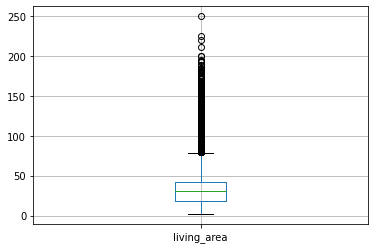

In [38]:
data.boxplot('living_area') #выведем диаграмму размаха
plt.show()

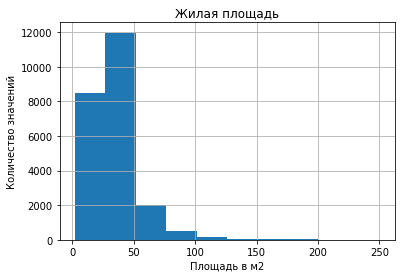

In [39]:
data.hist('living_area')
plt.title('Жилая площадь')
plt.ylabel('Количество значений')
plt.xlabel('Площадь в м2')
plt.show()

Учитывая большое максимальное значение в столбце с общей площадью, большое (250) значение в столбце с жилой площадью уже не так удивительно, оставим все как есть

**Площадь кухни**

In [40]:
data['kitchen_area'].describe() #выведем числовое описание данных по столбцу

count    23284.000000
mean        10.399988
std          5.440944
min          1.300000
25%          7.300000
50%          9.040000
75%         11.500000
max        107.000000
Name: kitchen_area, dtype: float64

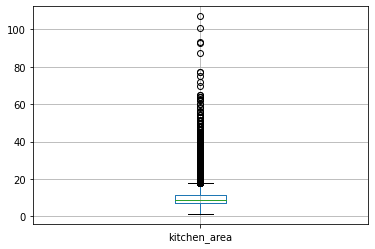

In [41]:
data.boxplot('kitchen_area') #выведем диаграмму размаха
plt.show()

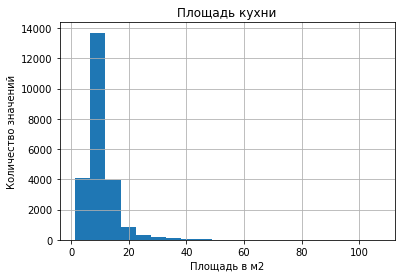

In [42]:
data.hist('kitchen_area', bins=20)
plt.title('Площадь кухни')
plt.ylabel('Количество значений')
plt.xlabel('Площадь в м2')
plt.show()

С площадью кухни все гораздо интереснее: даже в очень большой квартире она не может достигать 107 квадратных метров. По гистограмме видно, что большая часть значений приходится на отрезок от 5 до 10 метров, чуть меньше - от 10 до 15, далее от 1 до 5. Предположим, что совсем маленькие значения приходятся на студии, где, при желании, все-таки можно выделить отдельную площадь кухни, тогда все, что больше 40 можно убирать

In [43]:
data = data.query('kitchen_area < 40.0 or kitchen_area.isna()') #удалим значения больше 40

In [44]:
data['kitchen_area'].describe()

count    23153.000000
mean        10.179006
std          4.493015
min          1.300000
25%          7.200000
50%          9.040000
75%         11.400000
max         39.900000
Name: kitchen_area, dtype: float64

Медиана осталась той же, среднее значение несколько снизилось, максимальное значение стало гораздо меньше

**Цена объекта**

In [45]:
data['last_price'].describe() #выведем числовое описание данных по столбцу

count    2.315300e+04
mean     6.182349e+06
std      7.024687e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.700000e+06
max      2.892384e+08
Name: last_price, dtype: float64

Описание выдало экспоненциальную запись числа, следовательно, минимальная стоимость объекта - 430 000, а максимальная - 289 000 000, при среднем 6 182 000 и медиане 4 650 000. Убедимся в точности интерпретации, выведя значения по возрастанию в упрощенной записи

In [46]:
data['last_price'].sort_values()

17456       430000.0
14911       430000.0
16274       440000.0
5698        450000.0
16219       450000.0
            ...     
16495    159000000.0
2536     159984000.0
19155    160000000.0
16461    245000000.0
22831    289238400.0
Name: last_price, Length: 23153, dtype: float64

Минимальное значение - 430 000.0, а максимальное - 289 000 000.0. Либо пользователи запутались в количестве нулей, либо произошла техническая ошибка. Проверим выбросы по диаграмме размаха

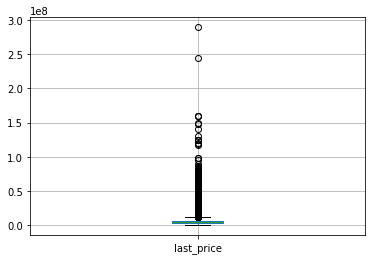

In [47]:
data.boxplot('last_price') #выведем диаграмму размаха
plt.show()

Значение 289 000 000 сильно выделяется, следом за ним идут значения в 245 000 000, нужно это исправить. Разделим значения, превышающие 100 000 000 на 100, а значения меньше 1 000 000  умножим на 10

In [48]:
data['last_price'][data['last_price'] >= 100000000.0]/= 100

In [49]:
data['last_price'][data['last_price'] <= 1000000.0]*= 10

In [50]:
data['last_price'].describe()

count    2.315300e+04
mean     6.152476e+06
std      5.733564e+06
min      1.010000e+06
25%      3.500000e+06
50%      4.700000e+06
75%      6.800000e+06
max      9.900000e+07
Name: last_price, dtype: float64

И среднее значение, и медиана выросли. Максимальное значение теперь 99 000 000, что выглядит менее сомнительно, чем 289 000 000, а минимальное - 1 000 000

**Количество комнат**

In [51]:
data['rooms'].describe() #выведем числовое описание данных по столбцу

count    23153.000000
mean         2.071006
std          1.029314
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

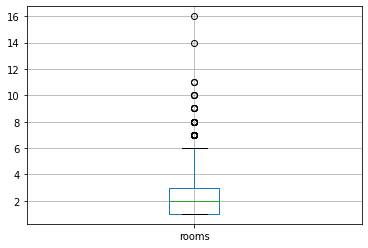

In [52]:
data.boxplot('rooms') #выведем диаграмму размаха
plt.show()

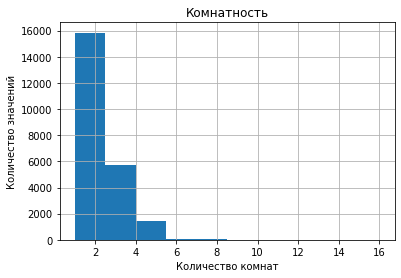

In [53]:
data.hist('rooms')
plt.title('Комнатность')
plt.ylabel('Количество значений')
plt.xlabel('Количество комнат')
plt.show()

Может, у кого-то и есть квартиры с 8 и даже 10 комнатами, но в 16 верится совсем с трудом. В диаграмме размаха значения выше 6 обозначены как выбросы, на гистограмме их количество минимально, поэтому избавимся от них 

In [54]:
data = data.query('rooms < 6.0 or rooms.isna()') #удалим значения больше 6

In [55]:
data['rooms'].describe() #выведем числовое описание данных по столбцу

count    23000.000000
mean         2.040087
std          0.953482
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

**Высота потолков**

In [56]:
data['ceiling_height'].describe() #выведем числовое описание данных по столбцу

count    23000.000000
mean         2.718255
std          0.987244
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Сразу видно аномально большое максимальное значение, посмотрим на диаграмму размаха

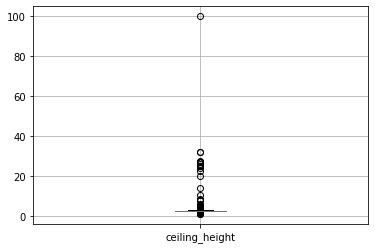

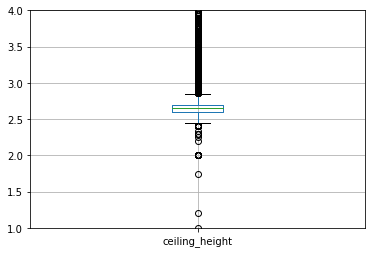

In [57]:
data.boxplot('ceiling_height') #построим диаграмму размаха 
plt.show() #выведем диаграмму размаха
data.boxplot('ceiling_height') #построим диаграмму размаха еще раз, но отобразим только высоту от 1 до 4 метров, чтобы увидеть нормальные значения по межквартильному размаху
plt.ylim(1, 4)
plt.show()

Межквартильный размах можно наблюдать между значениями в 2,5 и 3 метра, что нормально для высоты потолков в жилой недвижимости. Можно предположить, что значения свыше 20 метров - это вещественные значения, замененные на целочисленные. Преобразуем их обратно

In [58]:
data['ceiling_height'][(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 100)]/= 10

Помимо слишком больших значений, нереальными выглядят и значения от 1 до 2 метров. Предположим, что потолки в квартире могут быть натяжные, плюс дополнительные слои на полу и потолке, которые делают высоту потолков ниже, например, звукоизоляция, но даже так ниже 2 метров они быть не могут. Что касается высоких потолков, предположим, что в очень просторных апартаментах они могут достигать 5 метров. Удалим лишние значения

In [59]:
data = data.query('2.0 < ceiling_height < 5.0 or ceiling_height.isna()') #удалим значенияменьше 2 и больше 5 метров с помощью среза

In [60]:
data['ceiling_height'].describe() #выведем числовое описание данных по столбцу

count    22974.000000
mean         2.690878
std          0.205894
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

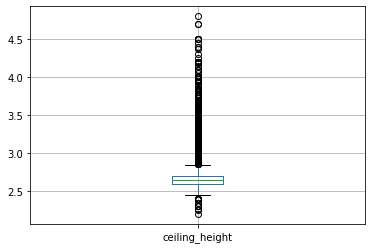

In [61]:
data.boxplot('ceiling_height') #выведем диаграмму размаха
plt.show()

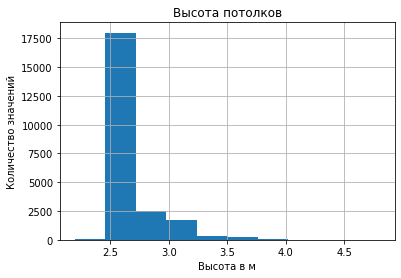

In [62]:
data.hist('ceiling_height') #выведем гистограмму
plt.title('Высота потолков')
plt.ylabel('Количество значений')
plt.xlabel('Высота в м')
plt.show()

Теперь значения выглядят как реальные

**Тип этажа квартиры**

In [63]:
data['floor_type'].value_counts() #выведем количество значений по категориям

другой       16902
последний     3223
первый        2849
Name: floor_type, dtype: int64

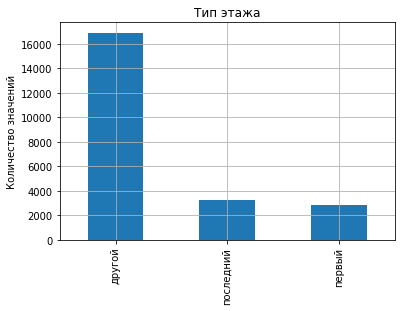

In [64]:
data['floor_type'].value_counts().plot(kind='bar', grid=True) #выведем гистограмму
plt.title('Тип этажа')
plt.ylabel('Количество значений')
plt.show()

Больше всего значений из категории "другой", что логично, так как этажей в многоквартирных домах чаще всего больше одного или двух

**Общее количество этажей в доме**

In [65]:
data['floors_total'].describe() #выведем числовое описание данных по столбцу

count    22974.000000
mean        10.680770
std          6.578301
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Медиана 9 и среднее 10.6 выглядят вполне реально, но максимальное значение - 60 - слишком большое. Рассмотрим данные на даиграмме размаха и гистограмме

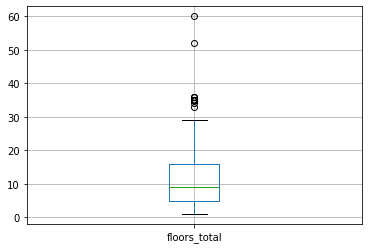

In [66]:
data.boxplot('floors_total') #выведем диаграмму размаха
plt.show()

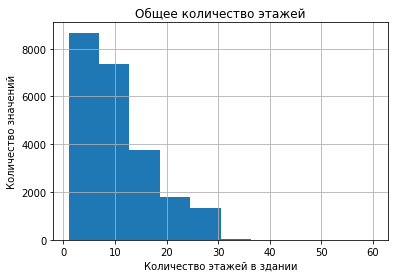

In [67]:
data.hist('floors_total') #выведем гистограмму
plt.title('Общее количество этажей')
plt.ylabel('Количество значений')
plt.xlabel('Количество этажей в здании')
plt.show()

Чаще всего жилые дома не превышают 30 этажей. Если верить результатам поискового запроса, можно оставить верхнюю границу в 37 этажей, но от всего, что выше, нужно избавиться

In [68]:
data = data.query('floors_total < 37.0 or floors_total.isna()') #удалим значения больше 37 с помощью среза

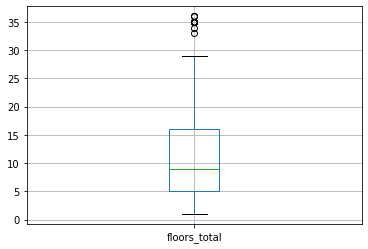

In [69]:
data.boxplot('floors_total') #выведем диаграмму размаха
plt.show()

In [70]:
data['floors_total'].describe() #выведем числовое описание данных по столбцу

count    22972.000000
mean        10.676824
std          6.564875
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

Среднее значение снизилось совсем немного, медиана осталась прежней, а максимальное значение выглядит более реальным

**Расстояние до центра города в метрах**

In [71]:
data['cityCenters_nearest'].describe() #выведем числовое описание данных по столбцу

count    17575.000000
mean     14333.326657
std       8612.831434
min        181.000000
25%       9496.000000
50%      13168.000000
75%      16357.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

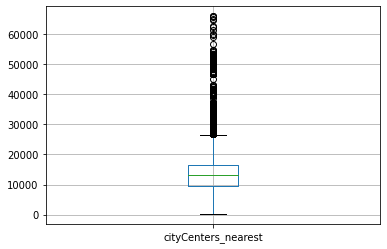

In [72]:
data.boxplot('cityCenters_nearest') #выведем диаграмму размаха
plt.show()

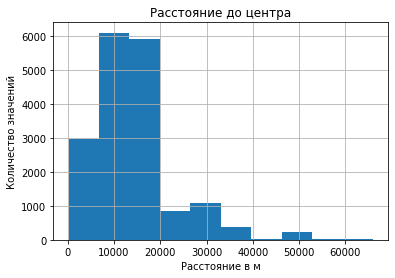

In [73]:
data.hist('cityCenters_nearest') #выведем гистограмму
plt.title('Расстояние до центра')
plt.ylabel('Количество значений')
plt.xlabel('Расстояние в м')
plt.show()

Расстояние указано в метрах, а среди населенных пунктов есть различные деревни и поселки, в таком случае до центра ближайшего города может быть и больше 60км, так же как и 180м, если квартира находится непосредственно в центре города

**Расстояние до ближайшего парка**

In [74]:
data['parks_nearest'].describe() #выведем числовое описание данных по столбцу

count    7762.000000
mean      492.169930
std       342.516808
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

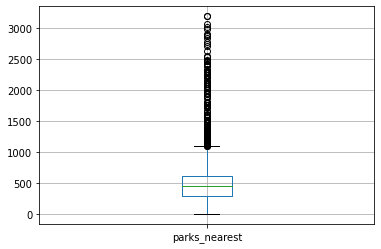

In [75]:
data.boxplot('parks_nearest') #выведем диаграмму размаха
plt.show()

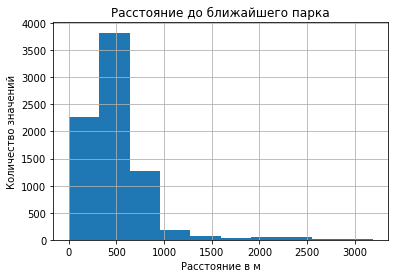

In [76]:
data.hist('parks_nearest') #выведем гистограмму
plt.title('Расстояние до ближайшего парка')
plt.ylabel('Количество значений')
plt.xlabel('Расстояние в м')
plt.show()

В данном столбце значения так же, как и в предыдущем, указаны в метрах, и если медиана, среднее и максимальное значение выглядят реальными, то мнимальное значение необычное. Даже если парк находится непосредственно рядом с домом, до него нужно пройти, как минимум, 30-50 метров, но никак не 1. Удалим все значения меньше 30м

In [77]:
data = data.query('parks_nearest > 30.0 or parks_nearest.isna()') #удалим значения меньше 30 

In [78]:
data['parks_nearest'].describe() #выведем числовое описание данных по столбцу

count    7665.000000
mean      498.174429
std       340.465471
min        32.000000
25%       295.000000
50%       458.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Медиана и среднее значение немного увеличились, а минимальное значение теперь не 1м, а 51м

**Вывод:** При исследовании данных в некоторых параметрах были найдены редкие и выбивающиеся значения. Если природа аномалии была понятна и данные действительно были искажены, корректное значение были восстановлены, в других случаях значения были удалены.

In [79]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,publication_day,publication_month,publication_year,city_center_km
count,22875.000000,2.287500e+04,22875.000000,22875.000000,22875.000000,22875.000000,22875.000000,22875.000000,22875.000000,22875.000000,...,17479.000000,7665.000000,17479.000000,8675.000000,19830.000000,2.287500e+04,22875.000000,22875.000000,22875.000000,17478.000000
mean,9.872568,6.046154e+06,58.340033,2.040831,2.690915,10.684372,33.224078,5.876852,10.124603,0.593967,...,0.597746,498.174429,0.759883,521.899135,180.075290,9.804634e+04,2.567082,6.400874,2017.371891,14.325645
std,5.661711,5.467330e+06,27.180123,0.953722,0.205867,6.569478,17.447547,4.866191,4.419150,0.961231,...,0.791401,340.465471,0.932841,277.694483,218.818685,4.438312e+04,1.789722,3.492920,1.036522,8.590385
min,0.000000,1.010000e+06,20.100000,1.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,32.000000,0.000000,13.000000,2.000000,7.962960e+03,0.000000,1.000000,2014.000000,0.180000
25%,6.000000,3.500000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.200000,0.000000,...,0.000000,295.000000,0.000000,300.000000,45.000000,7.609721e+04,1.000000,3.000000,2017.000000,9.500000
50%,9.000000,4.690000e+06,52.000000,2.000000,2.650000,9.000000,30.200000,4.000000,9.040000,0.000000,...,0.000000,458.000000,0.000000,506.000000,95.000000,9.459459e+04,3.000000,6.000000,2017.000000,13.180000
75%,14.000000,6.750000e+06,68.500000,3.000000,2.700000,16.000000,42.100000,8.000000,11.300000,1.000000,...,1.000000,616.000000,1.000000,733.000000,230.000000,1.135445e+05,4.000000,10.000000,2018.000000,16.360000
max,50.000000,9.900000e+07,295.000000,5.000000,4.800000,36.000000,250.000000,33.000000,39.900000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.542605e+06,6.000000,12.000000,2019.000000,65.970000


### Изучим, как быстро продавались квартиры (столбец days_exposition)

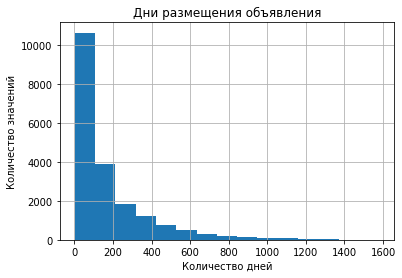

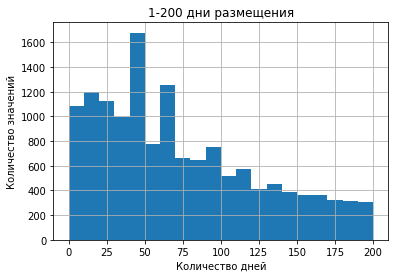

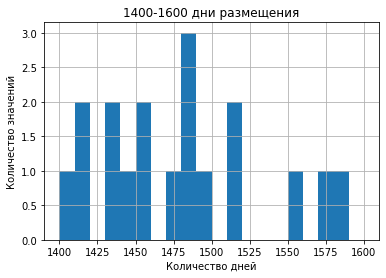

In [80]:
data.hist('days_exposition', bins=15) #выведем гистограмму
plt.title('Дни размещения объявления')
plt.ylabel('Количество значений')
plt.xlabel('Количество дней')
plt.show()
data.hist('days_exposition', bins=20, range=(0,200))
plt.title('1-200 дни размещения')
plt.ylabel('Количество значений')
plt.xlabel('Количество дней')
plt.show()
data.hist('days_exposition', bins=20, range=(1400,1600))
plt.title('1400-1600 дни размещения')
plt.ylabel('Количество значений')
plt.xlabel('Количество дней')
plt.show()

In [81]:
data['days_exposition'].describe() #выведем числовое описание данных по столбцу

count    19830.000000
mean       180.075290
std        218.818685
min          2.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

Большая часть объектов продалась в первые 100 дней размещения, причем, если ограничить гистограмму по дням, видно, что самая большая группа из них - объявления, снимаемые с публикации на 40й-50й день, следующая группа - 60й-70й день, третья - 10й-20й день. Значительно меньше группа объявлений, снятых с публикации в течение следующих 100 дней.

Более 300 объявлений были сняты с публикации в течение первых десяти дней. Если объект продан в течение 45 дней - это можно считать быстрой продажей. 
Если объект продан после 230 дней размещения объявления - это можно считать долгой продажей.
Помимо них, некоторые объявления (их единицы) были сняты с публикации через 1400-1600 дней (около 4 лет) - это можно считать необычно долгой прождажей. 

В среднем объявления снимаются с публикации через 100-200 дней (от трех месяцев до полугода) - медиана 95, среднее значение 180.

### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта

**Изучим, зависит ли цена от общей площади**

In [82]:
data['last_price'].corr(data['total_area']) #выведем коэффициент корреляции Пирсона

0.7252827928001349

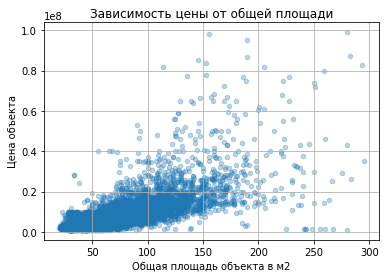

In [83]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, grid=True) #выведем диаграмму рассеяния
plt.title('Зависимость цены от общей площади')
plt.ylabel('Цена объекта')
plt.xlabel('Общая площадь объекта в м2')
plt.show()

Коэффициент корреляции Пирсона в данном случае 0.72, он стремится к 1, значит в большинстве случаев можно видеть линейную зависимость: от увеличения общей площади увеличится и цена объекта. Это можно увидеть и по диграмме рассеяния. 

**Изучим, зависит ли цена от жилой площади**

In [84]:
data['last_price'].corr(data['living_area']) #выведем коэффициент корреляции Пирсона

0.6136604766294844

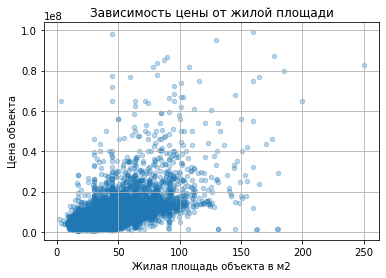

In [85]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3, grid=True) #выведем диаграмму рассеяния
plt.title('Зависимость цены от жилой площади')
plt.ylabel('Цена объекта')
plt.xlabel('Жилая площадь объекта в м2')
plt.show()

Коэффициент корреляции Пирсона 0.61, линейная зависимость есть, но не для всех объектов.То же мы видим по диаграмме рассеяния.

**Изучим, зависит ли цена от площади кухни**

In [86]:
data['last_price'].corr(data['kitchen_area']) #выведем коэффициент корреляции Пирсона

0.49070739539922253

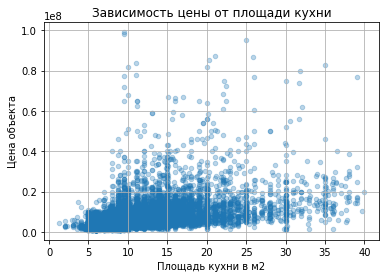

In [87]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3, grid=True) #выведем диаграмму рассеяния
plt.title('Зависимость цены от площади кухни')
plt.ylabel('Цена объекта')
plt.xlabel('Площадь кухни в м2')
plt.show()

Коэффициент корреляции 0.49 говорит о наличии связи, но не слишком сильной, т.е. в каких-то случаях стоимость объекта увеличивается с увеличением площади кухни, но так бывает не всегда. То же мы видим по диаграмме рассеяния.

**Изучим, зависит ли цена от количества комнат**

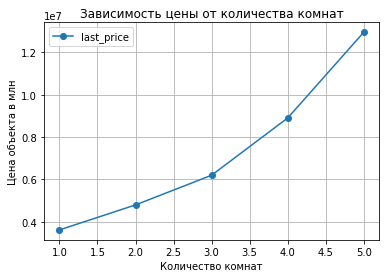

In [88]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(style='o-', grid=True) 
#выведем линейную диаграмму, для каждого значения по количеству комнат рассчитаем медиану стоимости объекта
plt.title('Зависимость цены от количества комнат')
plt.ylabel('Цена объекта в млн')
plt.xlabel('Количество комнат')
plt.show()

По линейной диаграмме явно заметен рост стоимости объекта в зависимости от количества комнат.

**Изучим, зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой)**

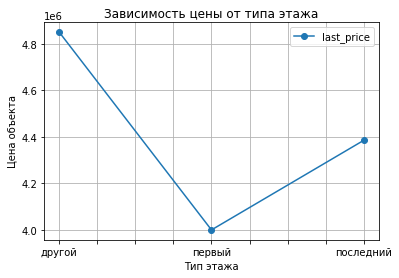

In [89]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(style='o-', grid=True)
#выведем линейную диаграмму, для каждого значения по типу этажа рассчитаем медиану стоимости объекта
plt.title('Зависимость цены от типа этажа')
plt.ylabel('Цена объекта')
plt.xlabel('Тип этажа')
plt.show()

Самые дорогие объекты находятся в категории "другой" этаж, чуть ниже по стоимости "последний". Зачастую продавцы снижают стоимость объектов на последнем этаже, чтобы повысить их привлекательность, т.к. покупатели опасаются различных проблем, например, протекающих крыш и сломанных лифтов. Самая низкая стоимость объектов на первом этаже. В этом случае поупатели опасаются проблем с сыростью, шумом рядом с окнами, попаданием уличной пыли в квартиру, повышенной вероятности кражи. 

**Изучим, зависит ли цена от даты размещения (день недели, месяц, год)**

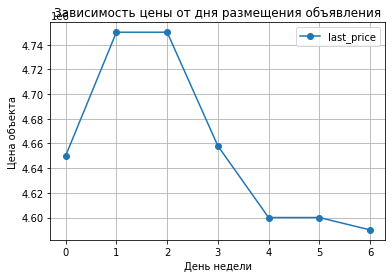

In [90]:
data.pivot_table(index='publication_day', values='last_price', aggfunc='median').plot(style='o-', grid=True)
#выведем линейную диаграмму, для каждого значения по дню публикации рассчитаем медиану стоимости объекта
plt.title('Зависимость цены от дня размещения объявления')
plt.ylabel('Цена объекта')
plt.xlabel('День недели')
plt.show()

Самая низкая стоимость объекта в воскресенье, а самая высокая - во вторник и среду, после чего идет резкий спад. Возможно, продавцы рассчитывают, что на выходных будет больше просмотров объявления, т.к. у многих людей больше свободного времени, а, следовательно, больше шансов продать объект, но также возможно, что это просто совпадение. 

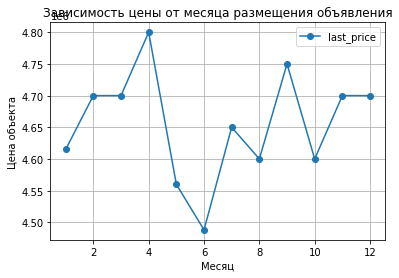

In [91]:
data.pivot_table(index='publication_month', values='last_price', aggfunc='median').plot(style='o-', grid=True)
#выведем линейную диаграмму, для каждого значения по месяцу публикации рассчитаем медиану стоимости объекта
plt.title('Зависимость цены от месяца размещения объявления')
plt.ylabel('Цена объекта')
plt.xlabel('Месяц')
plt.show()

Самая высокая стоимость объекта в апреле может быть связана с грядущими летними расходами - кто-то может стараться продать недвижимость дороже и потратить деньги на отпуск или вложить в загородную недвижимость или строительство.
Самая низкая стоимость объектов в июне может быть связана с тем, что люди хотят продать объект быстрее перед жаркой погодой и периодом отпусков. Резкое повышение стоимости в сентябре может быть связано с увеличением расходов - учеба детей, покупка зимней одежды и личного транспорта, а рост ноябре может быть связан как с зимними отпусками и подготовкой к праздникам, так и наоборот с нежеланием возиться с продажей недвижимости под новый год, когда в большинстве организаций идет отчетный период, а к повседневным делам добавляется еще подготовка к праздникам.

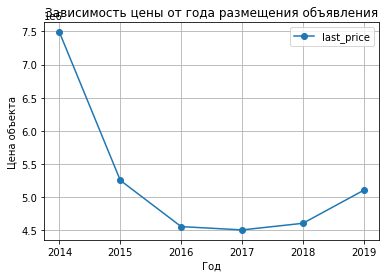

In [92]:
data.pivot_table(index='publication_year', values='last_price', aggfunc='median').plot(style='o-', grid=True)
#выведем линейную диаграмму, для каждого значения по году публикации рассчитаем медиану стоимости объекта
plt.title('Зависимость цены от года размещения объявления')
plt.ylabel('Цена объекта')
plt.xlabel('Год')
plt.show()

По диаграмме виден резкий спад стоимости объектов с 2014 по 2015 год, что может быть обосновано нестабильной экономической ситуацией в стране и колебаниями валютных курсов, из-за чего покупательская способность людей сниизилась. Самые низкие значения приходятся на 2017 год, далее начинается плавный рост.

**Изучим, менялась ли средняя общая площадь объектов в зависимости от года размещения**

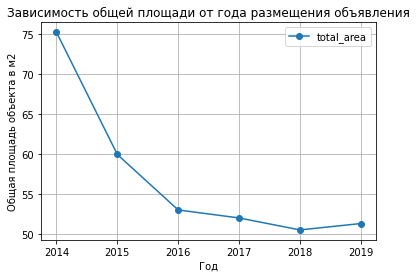

In [93]:
data.pivot_table(index='publication_year', values='total_area', aggfunc='median').plot(style='o-', grid=True)
#выведем линейную диаграмму, для каждого значения по году публикации рассчитаем медиану общей площади объекта
plt.title('Зависимость общей площади от года размещения объявления')
plt.ylabel('Общая площадь объекта в м2')
plt.xlabel('Год')
plt.show()

На этой диаграмме, как и на предыдущей виден спад, но более плавный, значит спад стоимости в большей степени может быть связан с уменьшением площади продаваемых объектов.

**Вывод:** Больше всего на общую (полную) стоимость объекта влияет общая площадь, количество комнат и тип этажа.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [94]:
popular_localities = data.pivot_table(index='locality_name', values='sq_meter_price', aggfunc=['count','mean']) 
#создадим сводную таблицу с названиями населенных пунктов и ценой за квадратный метр, применим к данным функцию расчета количества и вывода среднего значения
popular_localities.columns = ['quantity', 'avg_price'] #переименуем столбцы
popular_localities.sort_values(by='quantity', ascending=False).head(10)
#рассортируем данные в полученной сводной таблице по количеству объявлений

,quantity,avg_price
locality_name,,
Санкт-Петербург,15106,113244.753824
поселок Мурино,524,85022.515000
поселок Шушары,434,78303.212696
Всеволожск,390,68712.438282
Пушкин,353,103058.943201
Колпино,337,75333.295816
поселок Парголово,321,90480.153209
Гатчина,307,68746.146515
деревня Кудрово,283,92297.218834


In [95]:
locality_avg_price = popular_localities.sort_values(by='quantity', ascending=False).head(10)
locality_avg_price.sort_values(by='avg_price', ascending=False) 
#рассортируем данные в полученной сводной таблице по стоимости за квадратный метр

,quantity,avg_price
locality_name,,
Санкт-Петербург,15106,113244.753824
Пушкин,353,103058.943201
деревня Кудрово,283,92297.218834
поселок Парголово,321,90480.153209
поселок Мурино,524,85022.515000
поселок Шушары,434,78303.212696
Колпино,337,75333.295816
Гатчина,307,68746.146515
Всеволожск,390,68712.438282


Из десяти населенных пунктов с наибольшим числом объявлений самая высокая средняя цена за квадратный метр в городе Санкт-Петербург, самая низкая - в городе Выборг.

### Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра

In [96]:
data['city_center_km'] = data['city_center_km'].round(0) #округлим до целочисленного значения
data['city_center_km']

0        16.0
1        19.0
2        14.0
3         7.0
5         NaN
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: city_center_km, Length: 22875, dtype: float64

In [97]:
spb_locality = data[data['locality_name'] == 'Санкт-Петербург'] #выделим квартиры в Санкт-Петербурге с помощью столбца locality_name

**Учтем каждый километр расстояния (выведем средние цены квартир в одном километре от центра, в двух и так далее)**

In [98]:
spb_locality.pivot_table(index='city_center_km', values='last_price', aggfunc='mean')

,last_price
city_center_km,
0.0,1.962598e+07
1.0,1.487236e+07
2.0,1.346447e+07
3.0,1.026109e+07
4.0,1.077330e+07
5.0,1.161841e+07
6.0,1.226118e+07
7.0,1.302873e+07
8.0,8.929850e+06


**Построим график изменения средней цены для каждого километра от центра Петербурга**

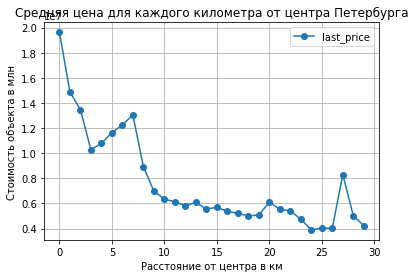

In [99]:
spb_locality.pivot_table(index='city_center_km', values='last_price', aggfunc='mean').plot(style='o-', grid=True) #выведем линейную диаграмму
plt.xlabel('Расстояние от центра в км')
plt.ylabel('Стоимость объекта в млн')
plt.title ('Средняя цена для каждого километра от центра Петербурга')
plt.show()

**Вывод:** Если стоимость объекта в центре достигает 19 000 000, то с каждым километром от центра стоимость плавно снижается за редкими исключениями

## Напишите общий вывод

**Общий вывод:** В ходе изучения исходных данных была проведена их предобработка: были найдены, изучены и, по возможности, устранены пропуски, явные и неявные дубликаты, преобразованы типы данных. В таблицу были добавлены новые столбцы со следующими параметрами: цена одного квадратного метра; день недели публикации объявления; месяц публикации объявления; год публикации объявления; тип этажа квартиры; расстояние до центра города в километрах. При исследовании данных в некоторых параметрах были найдены редкие и выбивающиеся значения. Если природа аномалии была понятна и данные действительно были искажены, корректное значение были восстановлены, в других случаях значения были удалены.  
Среднестатистическая квартира, находящаяся в Санкт-Петербурге или соседних населенных пунктах имеет общую площадь около 50 квадратных метров, из которых жилая – 30-40 и кухня – 9-10, высота потолков в среднем 2.65 метров, комнат 2, этаж не первый и не последний, всего этажей в доме 9. Средняя стоимость объекта 4,7 миллиона. В среднем объекты продаются в течение ста дней с даты публикации. Больше всего на общую (полную) стоимость объекта влияет общая площадь, количество комнат и тип этажа.  
Из десяти населенных пунктов с наибольшим числом объявлений самая высокая средняя цена за квадратный метр в городе Санкт-Петербург, самая низкая - в городе Выборг. Также цена объекта снижается в зависимости удаления от центра города.